# Making a map using the on-demand mapping services for a basemap and super-imposing some data

## Background 

The most familiar mapping services are those we often use to navigate with our phones for example: google maps. The difference between google maps and many of the examples we have looked at so far is that we do not download data in advance, process it and then create a map. Instead we have access to data when we need it and a a _relevant_ resolution. If we want to make a global map that is 1000 pixels across then Australia is probably just a few dozen pixels wide. If we instead decide to make a map to navigate across Melbourne, then a much higher resolution is needed _but only within the boundary of the map_. 

`Cartopy` provides access to various of the online mapping services that will serve image data on demand in the form of small image tiles at a specified resolution. The tools automatically query the service and assemble the tiles to make the map but there are some tricks that we need to know before we can use them.

## Exercise

This notebook is a template that needs to have some functions defined that it can use to plot the map.

Your job is to provide those functions so that this notebook will work. You are not going to change this notebook at all !

In [1]:
from src.dependencies import *
from src.my_functions import *

In [2]:
display_markdown(my_documentation(), raw=True)

   
# Earthquake Depth and Magnitude Map Maker

This notebook allows you to plot earthquakes which occurred between 1975 and 2022 on a map of a selected region.
    
## Parameters

To create a map of a region, you must first select parameters for mapping. These are as follows, and can be updated below;

-min_latitude  
-max_latitude  
-min_longitude  
-max_longitude  
-minimum_magnitude  
-water_features_resolution  
-coastline_resolution  


## `Python` documentation

Python hic est aliquis codicem quem animum advertere volumus

```python
# The classic "hello world" program
print("salve mundi !")
```


## The code !

In [3]:
min_latitude  = 30
max_latitude  = 40
min_longitude = -123
max_longitude = -113
minimum_magnitude = 5.5

#resolutions must be one of "10m", "50m", or "110m"
water_features_resolution = "10m"
coastline_resolution = "50m"

In [4]:
# Specify a region of interest

map_extent = [min_longitude, max_longitude, min_latitude, max_latitude]
basemap_name = "mapbox_outdoors"

In [5]:
#get coastlines and water features

coastline = my_coastlines(coastline_resolution)
water_features = my_earth_features(water_features_resolution, ["lakes","rivers_lake_centerlines"])

In [6]:
#get basemap

map_tiles_dictionary = my_basemaps()


In [7]:
#get earthquake data

point_data = my_point_data(map_extent, min_magnitude = minimum_magnitude)


Point data: 132 events in catalogue


In [8]:
raster = my_global_raster_data()

print(raster)

Cloudstore connection established
Remote and local file size both 21.99 MB, skipping - global_age_data.3.6.z.npz
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [9]:
## specify some shapefile data (?)


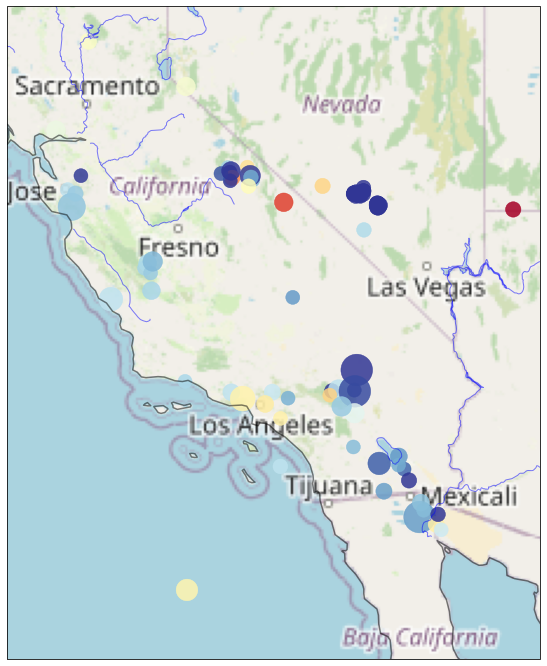

In [18]:
#make the map

map_tiles = map_tiles_dictionary["open_street_map"]

fig = plt.figure(figsize=(12, 12), facecolor="none")

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_tiles.crs)

# Set the size of the map
ax.set_extent(map_extent)

# Add the on-demand image - the second argument is the resolution and needs to be balanced with the 
# size of the area the map covers. 
ax.add_image(map_tiles, 5)
ax.add_feature(coastline, linewidth=1.5,  edgecolor="Black",  zorder=2, alpha=0.5)

# ax.add_feature(lakes)
for feature in water_features:
      ax.add_feature(feature,    linewidth=1.0,  edgecolor="Blue",  zorder=2, alpha=0.5)
    
# Add point data (lon, lat,colormapped variable, size variable)
ax.scatter(point_data[:,0], point_data[:,1], 1000**(point_data[:,2]/max(point_data[:,2])), c=point_data[:,3], marker='o', 
               cmap=cm.RdYlBu_r, alpha = 0.85, linewidth=0.5, transform=ccrs.Geodetic())


# Add raster data as contours

cf = ax.contourf(raster[:,:,0], raster[:,:,1], raster[:,:,2], 
         levels = np.arange(0.5,250,10), vmin=0, vmax=150,
         transform=ccrs.PlateCarree(),  cmap="RdYlBu",zorder=2, alpha=0.75)



In [11]:
fig.savefig("LA_Basin_Map.png", dpi=600)

See how well that worked by opening the [full-size image](./LA_Basin_Map.png). 

There really is a lot of detail available, but you can also see how long it takes to download and build the different resolutions. There is something of an art to finding the right balance. 

You may also find that very high resolution output results in memory errors. If so, restart the kernel and try again with a small image or lower dpi.

Signature: fig.savefig(fname, *, transparent=None, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, *, dpi='figure', format=None, metadata=None,
          bbox_inches=None, pad_inches=0.1,
          facecolor='auto', edgecolor='auto',
          backend=None, **kwargs
         )

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or binary file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and *fname* has no ext